In [1]:
__nbid__ = '0046'
__author__  = 'Benjamin Alan Weaver <benjamin.weaver@noirlab.edu>, David Herrera <david.herrera@noirlab.edu>'
__version__ = '20251205' # aaaammdd
__datasets__ = ['sdss_dr16']
__keywords__ = ['galaxies', 'extragalactic', 'spectroscopic redshift', 'plot:color-color', 'plot:histogram', 'plot:cmd']

# Cómo usar datos de SDSS en Astro Data Lab

*Benjamin Alan Weaver y el equipo de Astro Data Lab*

#### (_Traducción de [How_to_use_SDSS_Data.ipynb](https://github.com/astro-datalab/notebooks-latest/blob/master/04_HowTos/FileService/How_to_use_SDSS_Data.ipynb)_)

### Tabla de contenido

* [Objetivos y resumen del notebook](#Goals)
* [Avisos legales y atribuciones](#Disclaimer-&-Attribution)
* [Importaciones y configuración](#Imports-&-Setup)
* [Autenticación](#auth)
* [Galaxias BOSS (fotometría)](#BOSS-Galaxies-in-the-SDSS-Photometric-Catalog)
* [Galaxias BOSS (espectroscopía)](#BOSS-Galaxies-in-the-SDSS-Spectroscopic-Catalog)
* [Graficar espectros de SDSS](#Plotting-SDSS-Spectra)
* [Mostrar imágenes de SDSS](#Display-SDSS-Images)
* [Recursos y referencias](#Resources-&-References)

## Objetivos

Trabajar con tablas de SDSS en la base de datos de Data Lab.

## Resumen del notebook

Tenemos una copia del archivo de datos de SDSS-III/IV (DR8–DR16) en NOIRLab. Este notebook muestra algunas consultas y gráficos de datos de SDSS.

El sitio web de SDSS es [www.sdss.org](https://www.sdss.org).

Los ejemplos a continuación están enfocados principalmente en la selección de objetos y la espectroscopía para *el* survey [BOSS](https://www.sdss.org/surveys/boss/). Este notebook hace un uso extensivo de los algoritmos de selección de objetos descritos por [Reid et al. (2016)](http://adsabs.harvard.edu/abs/2016MNRAS.455.1553R).

<a class="anchor" id="attribution"></a>

# Avisos Legales y atribuciones

Avisos Legales
-----------
Tome en cuenta que usar el Astro Data Lab constituye un acuerdo con nuestros [Avisos Legales](https://datalab.noirlab.edu/disclaimers.php) mínimos.

Reconocimientos
---------------
Si ud. usa el **Astro Data Lab** en sus publicaciones de investigación, por favor incluya el siguiente texto en la sección de Reconocimientos de su publicaciones:

_Esta investigación utiliza servicios de datos proveeidos por el Astro Data Lab, el cual es parte del Programa "Community Science and Data Center" (CSDC) (Centro de Ciencia Comunitaria y Datos) del NSF NOIRLab. NOIRLab es operado por la "Association of Universities for Research in Astronomy (AURA), Inc."(Asociación de Universidaddes para la Investigación en Astronomía, Inc.), bajo un acuerdo de cooperación con la "U.S. National Science Foundation" (Fundación Nacional de Ciencia de los EE. UU.)._

Si utiliza **SPARCL junto con la plataforma de Astro Data Lab** (por medio de JupyterLab, línea de comando o interfaz de la web) en su publicación de investigación, por favor incluya el siguiente texto en la sección de Reconocimientos de su publicaciones:

_Esta investigación utiliza servicios o datos proporcionados por el "SPectra Analysis and Retrievable Catalog Lab" (SPARCL) (Laboratorio de Análisis y Catálogo Recuperable de Espectros) y el Astro Data Lab, ambos pertenecientes al Programa "Community Science and Data Center" (CSDC) (Centro de Ciencia Comunitaria y Datos) de NSF NOIRLab. NOIRLab es operado por la "Association of Universities for Research in Astronomy (AURA), Inc." (Asociación de Universidades para la Investigación en Astronomía, Inc.), bajo un acuerdo de cooperación con la "U.S. National Science Foundation" (Fundación Nacional de Ciencia de los EE. UU.)._

En cualquiera de los casos, **por favor cite las siguientes publicaciones**:

* Publicación del concepto de Data Lab: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, https://doi.org/10.1117/12.2057445

* Descripción general del Astro Data Lab: Nikutta et al., "Data Lab - A Community Science Platform", Astronomy and Computing, 33, 2020, https://doi.org/10.1016/j.ascom.2020.100411.

Si hace referencia al Jupyterlab / Jupyter notebooks de Data Lab, cite:

* Juneau et al., "Jupyter-Enabled Astrophysical Analysis Using Data-Proximate Computing Platforms", CiSE, 23, 15, 2021, https://doi.org/10.1109/MCSE.2021.3057097.

Si publica en una revista de la AAS, agregue también la palabra clave `\facility{Astro Data Lab}`

Y si está usando SPARCL, por vor agregue también `\software{SPARCL}` y cite:

* Juneau et al., "SPARCL: SPectra Analysis and Retrievable Catalog Lab", Conference Proceedings for ADASS XXXIII, 2024
https://doi.org/10.48550/arXiv.2401.05576.

La biblioteca de NOIRLab mantiene [listas de reconocimientos apropiados](https://noirlab.edu/science/about/scientific-acknowledgments) para usar cuando se hacen publicaciones utilizando los recursos, servicios o datos del Laboratorio.

---- **Versión en Inglés** ----


# Disclaimer & attribution

Disclaimers
-----------
Note that using the Astro Data Lab constitutes your agreement with our minimal [Disclaimers](https://datalab.noirlab.edu/disclaimers.php).

Acknowledgments
---------------
If you use **Astro Data Lab** in your published research, please include the text in your paper's Acknowledgments section:

_This research uses services or data provided by the Astro Data Lab, which is part of the Community Science and Data Center (CSDC) Program of NSF NOIRLab. NOIRLab is operated by the Association of Universities for Research in Astronomy (AURA), Inc. under a cooperative agreement with the U.S. National Science Foundation._

If you use **SPARCL jointly with the Astro Data Lab platform** (via JupyterLab, command-line, or web interface) in your published research, please include this text below in your paper's Acknowledgments section:

_This research uses services or data provided by the SPectra Analysis and Retrievable Catalog Lab (SPARCL) and the Astro Data Lab, which are both part of the Community Science and Data Center (CSDC) Program of NSF NOIRLab. NOIRLab is operated by the Association of Universities for Research in Astronomy (AURA), Inc. under a cooperative agreement with the U.S. National Science Foundation._

In either case **please cite the following papers**:

* Data Lab concept paper: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, https://doi.org/10.1117/12.2057445

* Astro Data Lab overview: Nikutta et al., "Data Lab - A Community Science Platform", Astronomy and Computing, 33, 2020, https://doi.org/10.1016/j.ascom.2020.100411

If you are referring to the Data Lab JupyterLab / Jupyter Notebooks, cite:

* Juneau et al., "Jupyter-Enabled Astrophysical Analysis Using Data-Proximate Computing Platforms", CiSE, 23, 15, 2021, https://doi.org/10.1109/MCSE.2021.3057097

If publishing in a AAS journal, also add the keyword: `\facility{Astro Data Lab}`

And if you are using SPARCL, please also add `\software{SPARCL}` and cite:

* Juneau et al., "SPARCL: SPectra Analysis and Retrievable Catalog Lab", Conference Proceedings for ADASS XXXIII, 2024
https://doi.org/10.48550/arXiv.2401.05576

The NOIRLab Library maintains [lists of proper acknowledgments](https://noirlab.edu/science/about/scientific-acknowledgments) to use when publishing papers using the Lab's facilities, data, or services.

# Importaciones y configuración

In [3]:
# Importaciones de bibliotecas estándar
from getpass import getpass
from io import BytesIO
from bz2 import BZ2File

# Importar y configurar matplotlib, etc.
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from astropy.visualization import astropy_mpl_style
import numpy as np
from astropy.io import fits
from astropy.io.votable import parse_single_table
from IPython.display import display, HTML

# Importar componentes de Data Lab.
from dl import queryClient as qc, storeClient as sc, authClient as ac

<a class="anchor" id="auth"></a>
### Autenticación

Se puede acceder a gran parte de la funcionalidad de Data Lab sin iniciar sesión explícitamente (el servicio utiliza un inicio de sesión anónimo). Pero algunas capacidades, por ejemplo guardar los resultados de sus consultas en su espacio de almacenamiento virtual, requieren un inicio de sesión (es decir, necesitará una cuenta de usuario registrada).

Si necesita iniciar sesión en Data Lab, descomente la celda a continuación y ejecútela:

In [3]:
# token = ac.login(input("Ingrese el nombre de usuario: (+ENTER) "), getpass("Ingrese la contraseña: (+ENTER) "))
# ac.quiénAmI()

### Configuración de Matplotlib

Esto es independiente porque algunas importaciones pueden interferir con estas configuraciones.

In [4]:
plt.style.use(astropy_mpl_style)
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
matplotlib.rcParams['axes.grid'] = True

### Variables globales específicas de SDSS

Establezca la publicación de datos y el esquema de base de datos correspondiente.

In [5]:
release = 16  # DR16
schema = 'sdss_dr{0:d}'.format(release)

### Funciones para trabajar con datos SDSS

Esto ayudará a calcular algunas cantidades no incluidas en la base de datos.

In [6]:
def auxilliary_colors(data):
    """Calcule algunas cantidades de color artificial útiles para la selección de objetivos.

    Parámetros
    ----------
    datos: :clase:`numpy.ndarray`
        Matriz que contiene magnitudes MODELO.

    Devoluciones
    -------
    :clase:`numpy.ndarray`
        Matriz que contiene colores auxiliares.
    """
    dt = data['modelmag_r'].dtype
    aux = np.zeros(data.shape, dtype=[(str('c_par'), dt), (str('c_perp'), dt), (str('d_perp'), dt)])
    aux['c_par'] = (0.7 * (data['modelmag_g'] - data['modelmag_r']) +
                    1.2 * (data['modelmag_r'] - data['modelmag_i'] - 0.18))
    aux['c_perp'] = ((data['modelmag_r'] - data['modelmag_i']) - 
                     (data['modelmag_g'] - data['modelmag_r'])/4.0 - 0.18)
    aux['d_perp'] = ((data['modelmag_r'] - data['modelmag_i']) -
                     (data['modelmag_g'] - data['modelmag_r'])/8.0)
    return aux

## Galaxias BOSS en el Catálogo Fotométrico SDSS

Actualmente, NOIRLab Data Lab ha cargado un subconjunto del catálogo fotométrico completo del SDSS que contiene objetos que tienen espectros en DR16.  Están cargadas todas las columnas que normalmente se encontrarían en la [tabla PhotoObjAll](http://skyserver.sdss.org/dr16/en/help/browser/browser.aspx#&&history=description+PhotoObjAll+U).

Hay varios tipos de mediciones de flujo reportadas por SDSS.  Consulte la [página de Magnitudes del SDSS](http://www.sdss.org/dr16/algorithms/magnitudes/) para obtener más detalles.
Seleccionaremos varias medidas de flujo y elegiremos objetos marcados como `SURVEY_PRIMARY` en la [máscara de bits RESOLVE_STATUS](http://www.sdss.org/dr16/algorithms/bitmasks/#RESOLVE_STATUS) (consulte la [resolve](http://www.sdss.org/dr16/algorithms/resolve/) documentación para más detalles).

A continuación construimos una consulta diseñada para recuperar los valores necesarios para recrear los cortes de selección.

Tenga en cuenta que las operaciones bit a bit que normalmente forman parte del estándar SQL están prohibidas por [ADQL](http://www.ivoa.net/documents/latest/ADQL.html) (aunque el operador `&` sea parte del estándar ADQL).

In [20]:
#
# Crear una lista de magnitudes para seleccionar. Esto es mucho más fácil que escribir cada uno.
#
select_magnitudes = ', \n'.join([', '.join(['{0}mag_{1}'.format(magtype, b)
                                          for b in 'ugriz'])
                               for magtype in ('model', 'cmodel', 'psf', 'fiber2')])
#
# Armar la consulta.
#
q = ("SELECT rerun, run, camcol, field, objid, ra, dec, devrad_i, \n" +
     select_magnitudes + "\n" +
     "FROM {0}.photoplate WHERE (resolvestatus & 256) != 0 LIMIT 100000".format(schema))
print(q)

SELECT rerun, run, camcol, field, objid, ra, dec, devrad_i, 
modelmag_u, modelmag_g, modelmag_r, modelmag_i, modelmag_z, 
cmodelmag_u, cmodelmag_g, cmodelmag_r, cmodelmag_i, cmodelmag_z, 
psfmag_u, psfmag_g, psfmag_r, psfmag_i, psfmag_z, 
fiber2mag_u, fiber2mag_g, fiber2mag_r, fiber2mag_i, fiber2mag_z
FROM sdss_dr16.photoplate WHERE (resolvestatus & 256) != 0 LIMIT 100000


Ahora envíe la consulta.

In [21]:
try:
    vot = qc.query(sql=q, fmt='votable', async_=False, timeout=300)
except Exception as e:
    print(e.message)
else:
    result = parse_single_table(BytesIO(vot.encode('utf-8'))).array
    rdev_i = result['devrad_i']/0.396  # convertir de nuevo a píxeles
    auxcolor = auxilliary_colors(result)

Calcula los cortes.

In [22]:
LOWZ = ((result['cmodelmag_r'] < (13.5 + auxcolor['c_par']/0.3)) & 
        (np.abs(auxcolor['c_perp']) < 0.2) &
        (result['cmodelmag_r'] > 16.0) & (result['cmodelmag_r'] < 19.6) &
        ((result['psfmag_r'] - result['cmodelmag_r']) > 0.3))

CMASS = ((result['cmodelmag_i'] < (19.86 + 1.6*(auxcolor['d_perp'] - 0.8))) &
         (result['cmodelmag_i'] > 17.5) & (result['cmodelmag_i'] < 19.9) &
         (auxcolor['d_perp'] > 0.55) &
         ((result['psfmag_i'] - result['modelmag_i']) > (0.2 + 0.2*(20.0 - result['modelmag_i']))) &
         ((result['psfmag_z'] - result['modelmag_z']) > (9.125 - 0.46*result['modelmag_z'])) &
         ((result['modelmag_r'] - result['modelmag_i']) < 2) &
         (result['fiber2mag_i'] < 21.5) & 
         (rdev_i < 20))

¿Cuántos obtuvimos?  Estos números variarán porque la cláusula `LIMIT 100000` de la consulta devuelve efectivamente una submuestra aleatoria.

In [23]:
print(LOWZ.sum())
print(CMASS.sum())

10698
16414


Graficar el color *versus* magnitud.  Puede ajustar los límites de la trama donde se indica a continuación.

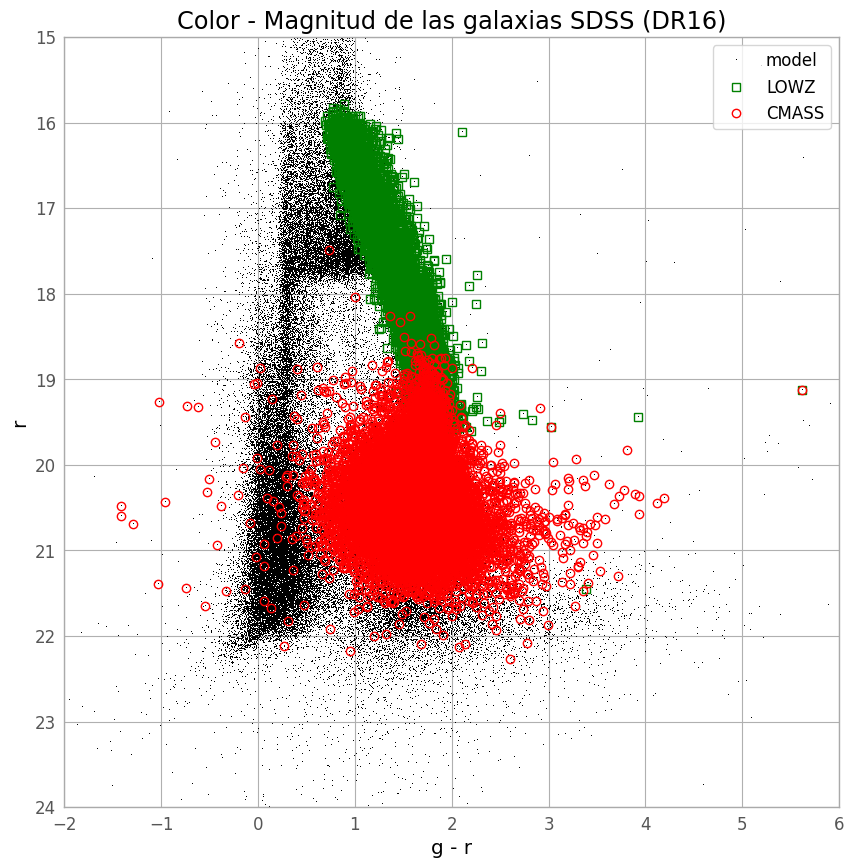

In [24]:
fig = plt.figure(dpi=100)
ax = fig.add_subplot(111)
p1 = ax.plot(result['modelmag_g'] - result['modelmag_r'],
             result['modelmag_r'],
             label='model', linestyle='none',
             marker=',', markeredgecolor='k', markerfacecolor='k')
p2 = ax.plot(result['modelmag_g'][LOWZ] - result['modelmag_r'][LOWZ],
             result['modelmag_r'][LOWZ],
             label='LOWZ', linestyle='none',
             marker='s', markeredgecolor='g', markerfacecolor='none')
p3 = ax.plot(result['modelmag_g'][CMASS] - result['modelmag_r'][CMASS],
             result['modelmag_r'][CMASS],
             label='CMASS', linestyle='none',
             marker='o', markeredgecolor='r', markerfacecolor='none')
foo = ax.set_xlim([-2, 6])  # Ajuste el eje x aquí.
foo = ax.set_ylim([24, 15])  # Ajuste el eje y aquí.
foo = ax.set_xlabel('g - r')
foo = ax.set_ylabel('r')
foo = ax.set_title('Color - Magnitud de las galaxias SDSS (DR{0:d})'.format(release))
l = ax.legend(numpoints=1)

Grafica un diagrama color-color.  Los límites de graficado predeterminados deberían dar un graficado cuadrado.

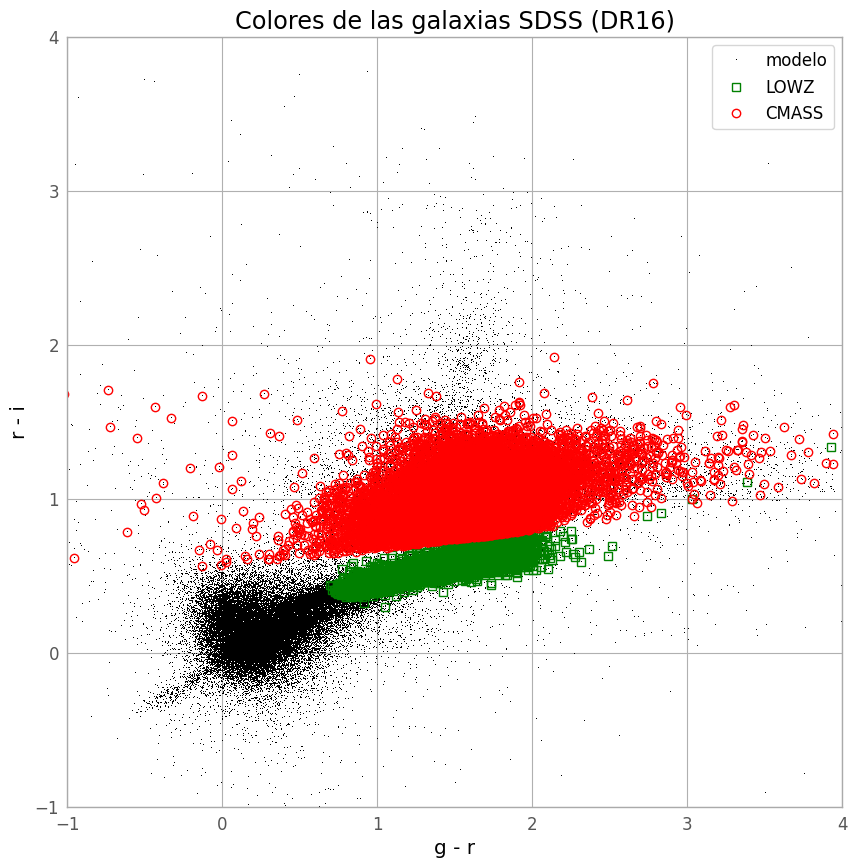

In [25]:
fig = plt.figure(dpi=100)
ax = fig.add_subplot(111)
p1 = ax.plot(result['modelmag_g'] - result['modelmag_r'],
             result['modelmag_r'] - result['modelmag_i'],
             label='modelo', linestyle='none',
             marker=',', markeredgecolor='k', markerfacecolor='k')
p2 = ax.plot(result['modelmag_g'][LOWZ] - result['modelmag_r'][LOWZ], 
             result['modelmag_r'][LOWZ] - result['modelmag_i'][LOWZ],
             label='LOWZ', linestyle='none',
             marker='s', markeredgecolor='g', markerfacecolor='none')
p3 = ax.plot(result['modelmag_g'][CMASS] - result['modelmag_r'][CMASS], 
             result['modelmag_r'][CMASS] - result['modelmag_i'][CMASS],
             label='CMASS', linestyle='none',
             marker='o', markeredgecolor='r', markerfacecolor='none')
foo = ax.set_xlim([-1, 4])  # Ajuste el eje x aquí.
foo = ax.set_ylim([-1, 4])  # Ajuste el eje y aquí.
foo = ax.set_xlabel('g - r')
foo = ax.set_ylabel('r - i')
foo = ax.set_title('Colores de las galaxias SDSS (DR{0:d})'.format(release))
l = ax.legend(numpoints=1)

## Galaxias BOSS en el catálogo espectroscópico SDSS

### Número de objetos

¿Cuántos objetos hay en la tabla specObj?

In [26]:
q = "SELECT COUNT(*) AS nrows FROM {0}.specobj".format(schema)
result = qc.query(adql=q, fmt='csv')
print(result)

nrows
5107045



### Seleccione los espectros LOWZ y CMASS.

La [máscara de bits BOSS_TARGET1](http://www.sdss.org/dr13/algorithms/bitmasks/#BOSS_TARGET1) hace que esto sea muy fácil.  ¡SDSS [usa máscaras de bits ampliamente](http://www.sdss.org/dr13/algorithms/bitmasks/)!

In [27]:
q = ("SELECT boss_target1 FROM {0}.specobj WHERE boss_target1 != 0 LIMIT 100000".format(schema))
try:
    vot = qc.query(sql=q, fmt='votable')
except Exception as e:
    print(e.message)
else:
    result = parse_single_table(BytesIO(vot.encode('utf-8'))).array
    boss_target1 = result['boss_target1']
    print(boss_target1)

[134 134 134 ... 6 1024 14]


¿Cuántos de cada tipo de selección obtuvimos?  El enlace a `BOSS_TARGET1` anterior proporciona el significado de cada valor.  En muchos casos, los individuos se combinan bit a bit y juntos, ya que un objeto en el cielo podría ser seleccionado por varias razones.

In [28]:
for mask in (1, 5, 6, 9, 14, 15, 33, 41, 133, 134, 135, 140, 141, 142):
    print(mask, (boss_target1 == mask).sum())

1 16751
5 0
6 664
9 153
14 1462
15 11
33 0
41 55
133 1
134 52605
135 503
140 3972
141 1
142 0


Seleccione galaxias LOWZ e imprima cuántas encontramos.

In [29]:
q_lowz = ("SELECT specobjid, fluxobjid, bestobjid, plate, mjd, fiberid, z_noqso FROM {0}.specobj " + 
          "WHERE (boss_target1 & {1:d}) != 0 AND scienceprimary = 1 AND " +
          "zwarning_noqso = 0 AND class_noqso = 'GALAXY' LIMIT 100000").format(schema, 1)
try:
    vot = qc.query(sql=q_lowz, fmt='votable')
except Exception as e:
    print(e.message)
else:
    result = parse_single_table(BytesIO(vot.encode('utf-8'))).array
    plate_lowz = result['plate']
    mjd_lowz = result['mjd']
    fiber_lowz = result['fiberid']
    redshift_lowz = result['z_noqso']
    print(len(redshift_lowz))

100000


Seleccione galaxias CMASS e imprima cuántas encontramos.

In [30]:
q_cmass = ("SELECT specobjid, fluxobjid, bestobjid, plate, mjd, fiberid, z_noqso FROM {0}.specobj " + 
           "WHERE (boss_target1 & {1:d}) != 0 AND scienceprimary = 1 AND " +
           "zwarning_noqso = 0 AND class_noqso = 'GALAXY' LIMIT 100000").format(schema, 2)
try:
    vot = qc.query(sql=q_cmass, fmt='votable')
except Exception as e:
    print(e.message)
else:
    result = parse_single_table(BytesIO(vot.encode('utf-8'))).array
    plate_cmass = result['plate']
    mjd_cmass = result['mjd']
    fiber_cmass = result['fiberid']
    redshift_cmass = result['z_noqso']
    print(len(redshift_cmass))

100000


### Distribución de corrimiento al rojo

Aquí está la distribución del corrimiento al rojo de las galaxias LOWZ y CMASS.  Tenga en cuenta que el número de intervalos para CMASS se elige de modo que los *tamaños* de los intervalos sean aproximadamente los mismos que los de la muestra LOWZ (cuando se pueda consultar todo el conjunto de datos).

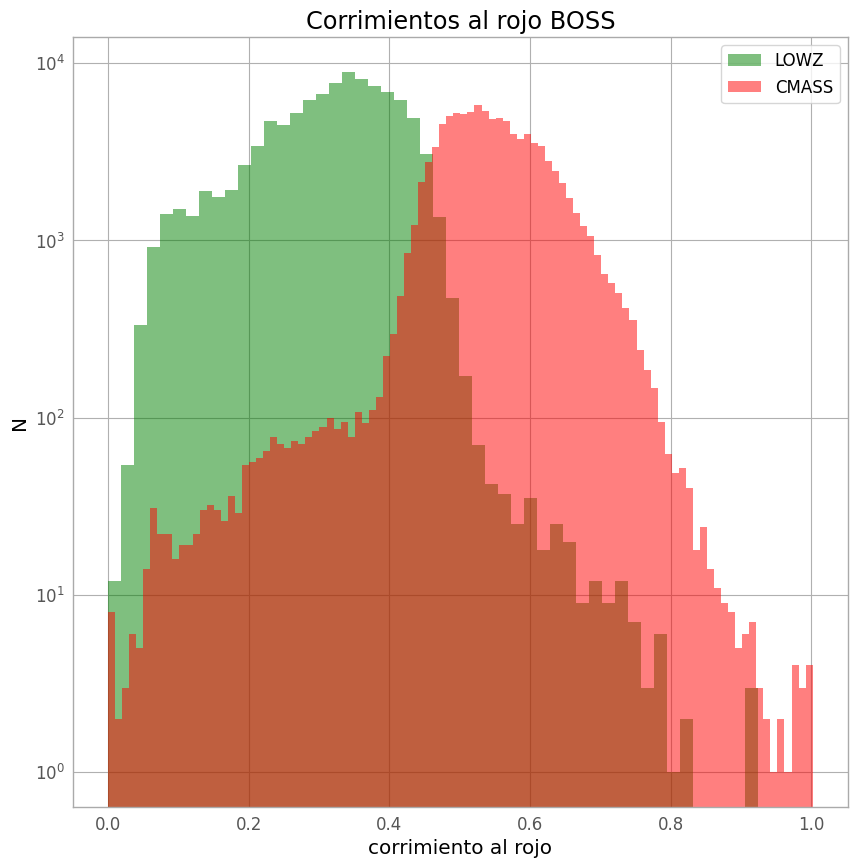

In [31]:
fig = plt.figure(dpi=100)
ax = fig.add_subplot(111)
n_lowz, bins_lowz, patches_lowz = ax.hist(redshift_lowz, 50, facecolor='green', alpha=0.5, label='LOWZ')
n_cmass, bins_cmass, patches_cmass = ax.hist(redshift_cmass, 100, facecolor='red', alpha=0.5, label='CMASS')
foo = ax.set_yscale('log')
foo = ax.set_xlabel("corrimiento al rojo")
foo = ax.set_ylabel("N")
foo = ax.set_title("Corrimientos al rojo BOSS")
foo = ax.legend()

### ¿Qué es eso? ¿Algunas galaxias CMASS tienen corrimiento al rojo negativo?

Echemos un vistazo a estos espectros. El enlace "SkyServer" mostrará un espectro simple junto con una imagen del objeto seleccionado.  El enlace "SAS" mostrará una vista interactiva del espectro con opciones para descargar el espectro mismo.

In [32]:
rerun = 'v5_13_0'  # DR16
negative_z = (redshift_cmass >= bins_cmass[0]) & (redshift_cmass < bins_cmass[1])
display(HTML('<ul>'))
for p, m, f in zip(plate_cmass[negative_z], mjd_cmass[negative_z], fiber_cmass[negative_z]):
    display(HTML(('<li>' +
                  '<a href="https://skyserver.sdss.org/dr{0:d}/en/tools/explore/summary.aspx?plate={2}&mjd={3}&fiber={4}">SkyServer: {2}, {3}, {4}</a></li>'.format(release, rerun, p, m, f) +
                  '<a href="https://dr{0:d}.sdss.org/optical/spectrum/view?run2d={1}&plateid={2}&mjd={3}&fiberid={4}">SAS: {2}, {3}, {4}</a>'.format(release, rerun, p, m, f) +
                  '</li>')))
display(HTML('</ul>'))

Después de observar algunos de estos, puede notar (desde el enlace "SkyServer") que varios de ellos son objetos rojos puntuales que están cerca de un objeto más brillante. Una hipótesis plausible es que la selección de color CMASS no funciona tan bien cuando un objeto cercano y más brillante podría estar contaminando la fotometría, lo que dificultaría distinguir las LRG de las estrellas M.

## Graficado de espectros SDSS

Además de las bases de datos que contienen los datos del catálogo SDSS, NOIRLab Data Lab también contiene las imágenes y los espectros.  De hecho, ¡podemos graficar estos datos directamente desde un notebook de Data Lab!

Primero, necesitamos algunas funciones auxiliares.

In [33]:
def extract_spectrum(plate, mjd, fiber, run2d='v5_13_0', release=16, sas='sdss_dr16://'):
    """Extrae un espectro de un archivo spPlate.
    
    Parámetros
    ----------
    plate : :clase:`int`
        Placa de observación.
    mjd: :clase:`int`
        MJD de observación.
    fiber : :clase:`int`
        Número de fibra.
    run2d: :clase:`str`, opcional
        Identificación de reducción.
    release: :clase:`int`, opcional
        Número de publicación de datos.
    sas : :clase:`str`, opcional
        Ruta raíz a los datos SDSS.
    
    Devoluciones
    -------
    :func:`tupla`
        Una tupla que contiene longitud de onda, flujo, varianza inversa del flujo y espectro del cielo.
    """
    vopath = "{0}sdss/spectro/redux/{1}/{2:04d}/spPlate-{2:04d}-{3:05d}.fits".format(sas, run2d, plate, mjd)
    with fits.open(sc.get(vopath, mode='fileobj')) as hdulist:
        hdr = hdulist[0].header
        flux = hdulist[0].data[fiber-1, :]
        ivar = hdulist[1].data[fiber-1, :]
        sky = hdulist[6].data[fiber-1, :]
    loglam = hdr['COEFF0'] + hdr['COEFF1']*np.arange(hdr['NAXIS1'], dtype=flux.dtype)
    wavelength = 10.0**loglam
    return wavelength, flux, ivar, sky


def plot_spectrum(plate, mjd, fiber, showsky=False, **kwargs):
    """Gráfico de espectro SDSS/BOSS simple.
    
    Parámetros
    ----------
    plate : :clase:`int`
        Placa de observación.
    mjd: :clase:`int`
        MJD de observación.
    fiber : :clase:`int`
        Número de fibra.
    showsky: :clase:`bool`, opcional
        Si es `True`, grafica el espectro del cielo.
    """
    wavelength, flux, ivar, sky = extract_spectrum(plate, mjd, fiber, **kwargs)
    fig = plt.figure(dpi=100)
    ax = fig.add_subplot(111)
    p0 = ax.plot(wavelength, flux, 'k-', linewidth=1, label='OBJETO')
    if showsky:
        p1 = ax.plot(wavelength, sky, 'm-', linewidth=1, label='CIELO')
    foo = ax.set_title("placa-mjd-fibra: {0:04d}-{1:05d}-{2:04d}".format(plate, mjd, fiber))
    foo = ax.set_xlabel("Longitud de onda [Å]")
    foo = ax.set_ylabel(r"Flujo [$10^{-17} \; \mathrm{ergio} \; \mathrm{cm2} \; \mathrm{s1} \; \mathrm{\AA}^{-1}$]")
    l = ax.legend()

En primer lugar, algunos espectros que, como la lista anterior, se consideraron galaxias distantes pero que tienen un corrimiento al rojo muy bajo.  Puedes obtener una mejor vista de estos espectros en los enlaces de arriba, pero esto demuestra el hecho curioso de que muchos espectros de BOSS son *más débiles* que el cielo.

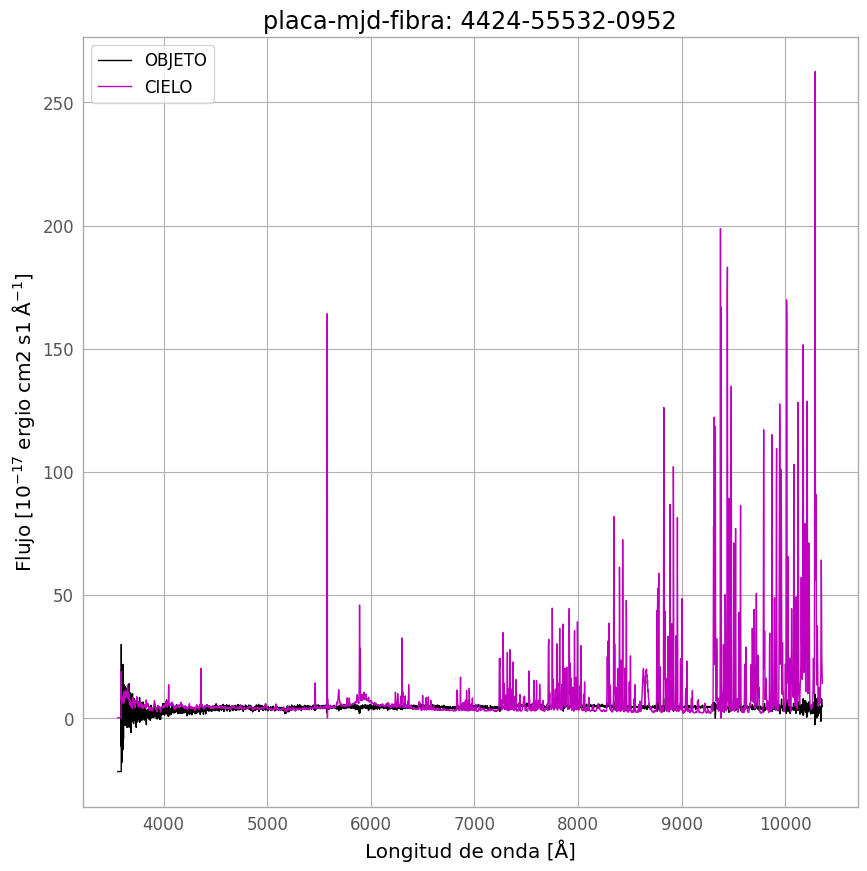

In [34]:
plot_spectrum(4424, 55532, 952, showsky=True)

Aquí hay otro del mismo tipo.  Si miras en el rango de 6000 - 8000 Å, puedes ver algunas características que se parecen a ciertas estrellas M.

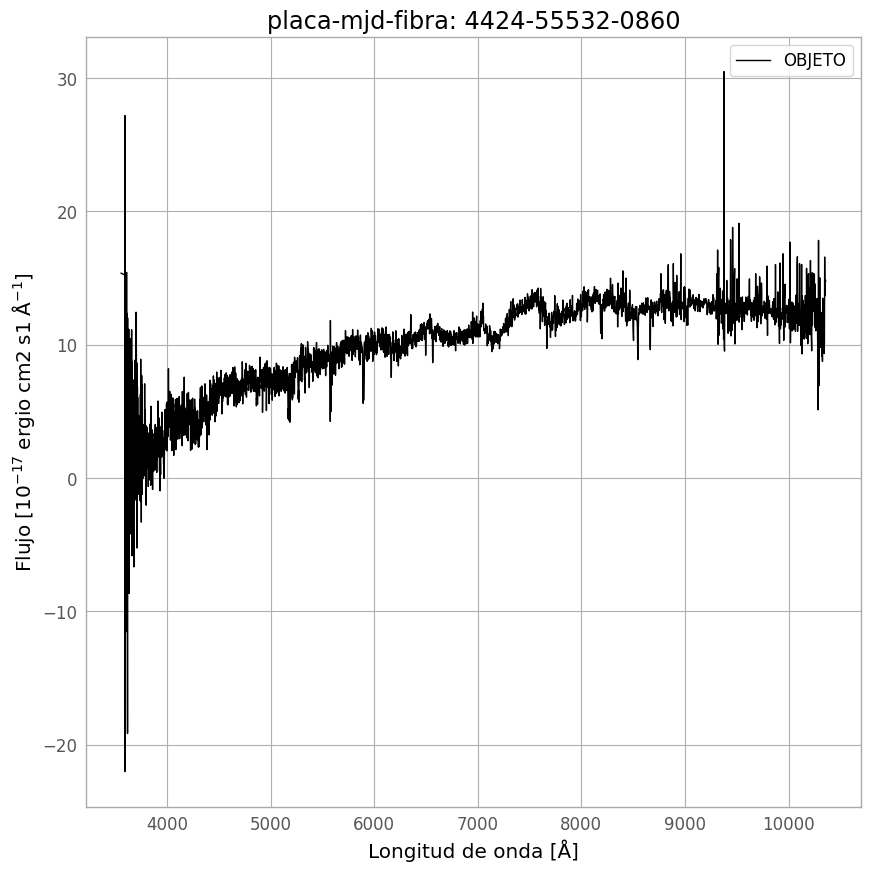

In [35]:
plot_spectrum(4424, 55532, 860)

Aquí hay un LRG "clásico" con un corrimiento al rojo de 0,67 (¡que en realidad fue apuntado como LOWZ!).

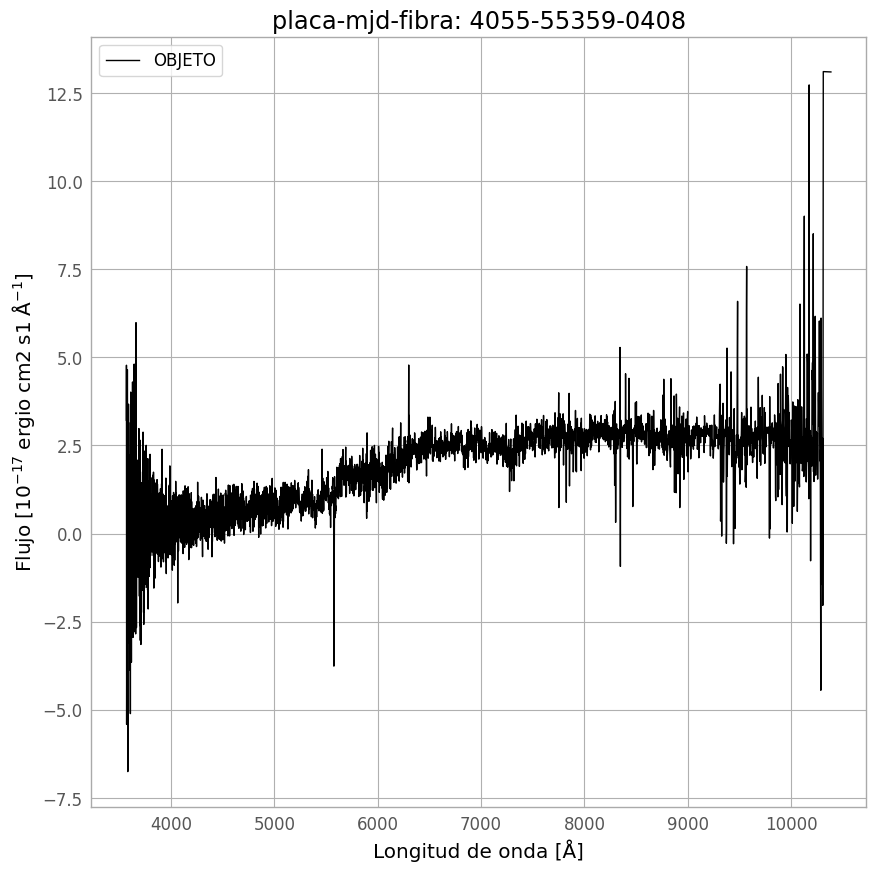

In [36]:
plot_spectrum(4055, 55359, 408)

## Mostrar imágenes SDSS

Aquí obtendremos algo de práctica en el graficado de imágenes de cuadro corregidos en Data Lab.  La imagen original está [aquí](https://dr12.sdss.org/fields/runCamcolField?field=13&camcol=1&run=6122).  Los "cuadros corregidos" son imágenes a las que se les ha restado el cielo y se han calibrado de manera que los píxeles individuales tengan unidades de flujo físico.  En el caso de imágenes SDSS las unidades son [nanomaggies](https://www.sdss.org/dr16/help/glossary/#nanomaggie).  Los cuadros corregidos por SDSS se describen [aquí](https://data.sdss.org/datamodel/files/BOSS_PHOTOOBJ/frames/RERUN/RUN/CAMCOL/frame.html).

Primero, algunas funciones de utilidad para extraer las imágenes.

In [37]:
def asinh_image(image, band='r'):
    """Convierte una imagen en nanomaggies en magnitudes asinh.
    
    Parámetros
    ----------
    image: :clase:`numpy.ndarray`
        Datos de imagen, leídos desde *por ejemplo* un archivo de cuadro corregido SDSS-III.
    band : :clase:`str`, opcional
        Banda de filtro, por omisión *r*.
    
    Devoluciones
    -------
    :clase:`numpy.ndarray`
        Datos de imagen convertidos a magnitudes asinh.
    """
    C = -2.5/np.log(10.0)
    b = dict(u=1.4e-10, g=0.9e-10, r=1.2e-10, i=1.8e-10, z=7.4e-10)
    mag = C*(np.arcsinh((image*1.0e-9)/(2.0*b[band])) + np.log(b[band]))
    return mag


#
# Leer los archivos es una operación costosa, así que almacene en caché los resultados.
#
extract_frame_cache = dict()


def extract_frame(run, camcol, field, band, sas='sdss_dr16://'):
    """Obtenga datos de imagen de un cuadro corregido SDSS, que puede estar en una ubicación remota.

    Parámetros
    ----------
    run: :clase:`int`
        Número de ejecución.
    camcol: :clase:`int`
        Número de columna.
    field: :clase:`int`
        Número de campo
    band : :clase:`str`
        Banda de filtro.
    sas : :clase:`str`, opcional
        Ruta raíz a los datos SDSS.
    
    Devoluciones
    -------
    :clase:`numpy.ndarray`
        Datos de imagen.
    """
    fm = '{0}eboss/photoObj/frames/301/{1:d}/{2:d}/frame-{3}-{1:06d}-{2:d}-{4:04d}.fits.bz2'.format(sas, run, camcol, band, field)
    if fm not in extract_frame_cache:
        with BZ2File(BytesIO(sc.get(fm, mode='binary'))) as cf:
            with fits.open(cf) as hdulist:
                extract_frame_cache[fm] = hdulist[0].data
    return extract_frame_cache[fm]


def display_frame(run, camcol, field, band, asinh=False, invert=False, **kwargs):
    """Despliega un cuadro corregido SDSS.
    
    Parámetros
    ----------
    run: : :clase:`int`
        Número de ejecución.
    camcol : :clase:`int`
        Número de columna.
    field: :clase:`int`
        Número de campo.
    band : :clase:`str`
        Banda de filtro.
    asinh: :clase:`bool`, opcional
        Si es "True", los valores de píxeles se convertirán en magnitudes asinh.
    invert : :clase:`bool`, opcional
        Si es ``True``, se muestra una imagen en escala de grises invertida.
    sas : :clase:`str`, opcional
        Ruta raíz a los datos SDSS.

    Devoluciones
    -------
    :func:`tupla`
         Identifica la figura, imagen y barra de colores.
    """
    color_map = 'gray_r'
    if invert:
        color_map = 'gray'
    image = extract_frame(run, camcol, field, band, **kwargs)
    clim=(0.0, 1.0)
    if asinh:
        image = asinh_image(image, band=band)
        clim=(26, 18)
    fig = plt.figure(dpi=100)
    im = plt.imshow(image, cmap=color_map, clim=clim, origin='lower')
    foo = im.axes.set_title('frame-{0}-{1:06d}-{2:d}-{3:04d}.fits'.format(band, run, camcol, field))
    cb = plt.colorbar(shrink=0.6)
    return fig, im, cb

Comienza con la banda *r*, sin opciones de visualización especiales, excepto que invertimos la escala de grises para que el cielo se oscurezca.

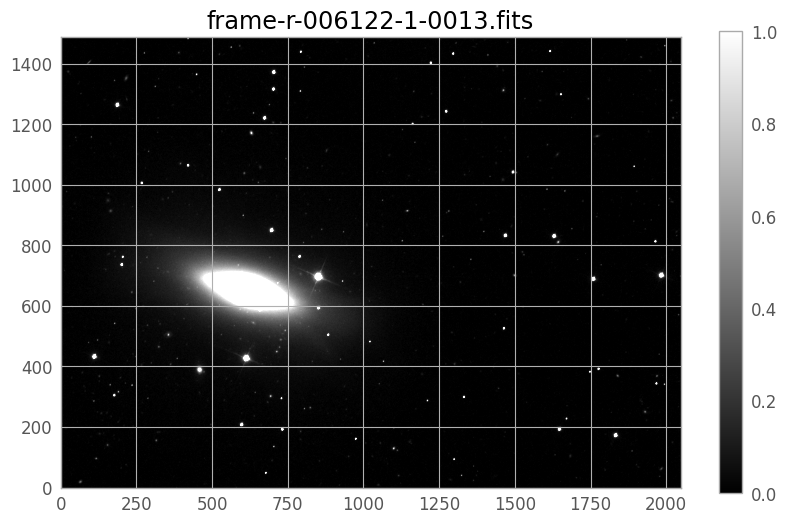

In [38]:
fig, im, cb = display_frame(6122, 1, 13, 'r', invert=True)

Muestra un histograma de los píxeles.  Demostramos el histograma para justificar los límites de la escala de grises en la función anterior.  En este caso, la gran mayoría de píxeles están en el rango `[0, 1]`.

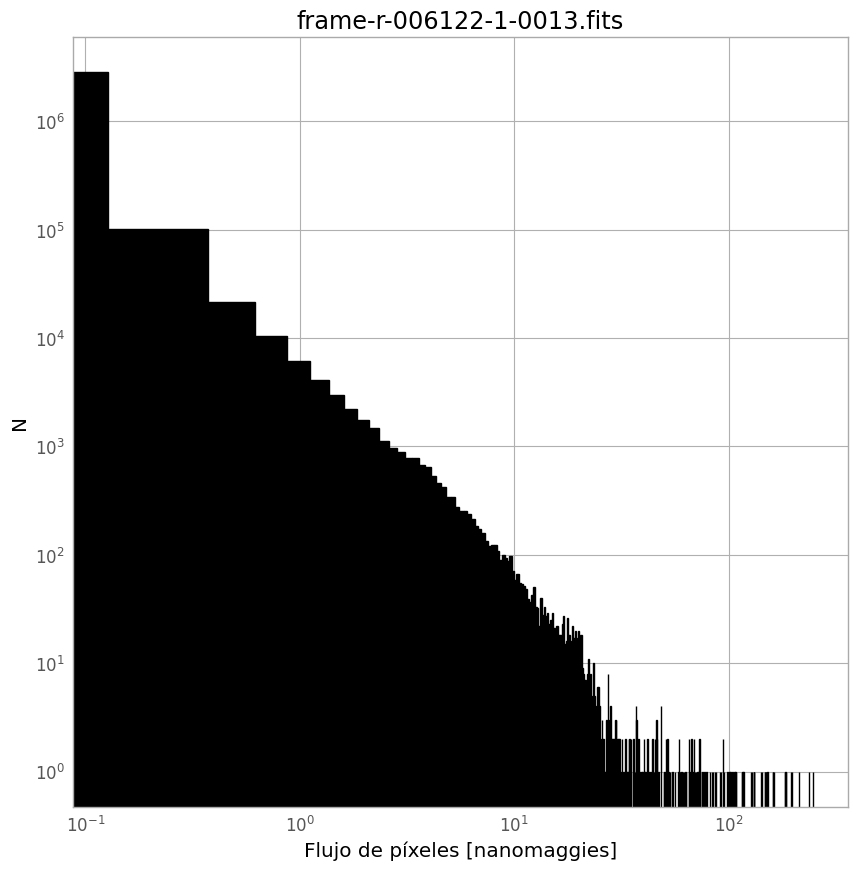

In [39]:
image = im.get_array().data
fig = plt.figure(dpi=100)
ax = fig.add_subplot(111)
n, bins, patches = ax.hist(image.flatten(), bins=1000, facecolor='k', edgecolor='k')
foo = ax.set_xscale('log')
foo = ax.set_yscale('log')
foo = ax.set_xlabel('Flujo de píxeles [nanomaggies]')
foo = ax.set_ylabel('N')
foo = ax.set_title('frame-r-006122-1-0013.fits')

Ahora, muestre una imagen con los píxeles convertidos a unidades de magnitud.  No necesitamos invertir esta imagen porque una magnitud mayor es más oscura.

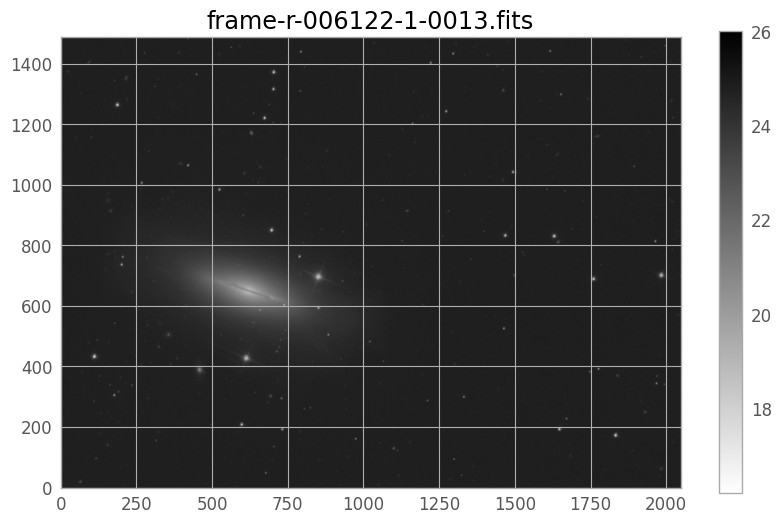

In [40]:
fig, im, cb = display_frame(6122, 1, 13, 'r', asinh=True)

De manera similar, hacer un histograma de los píxeles.

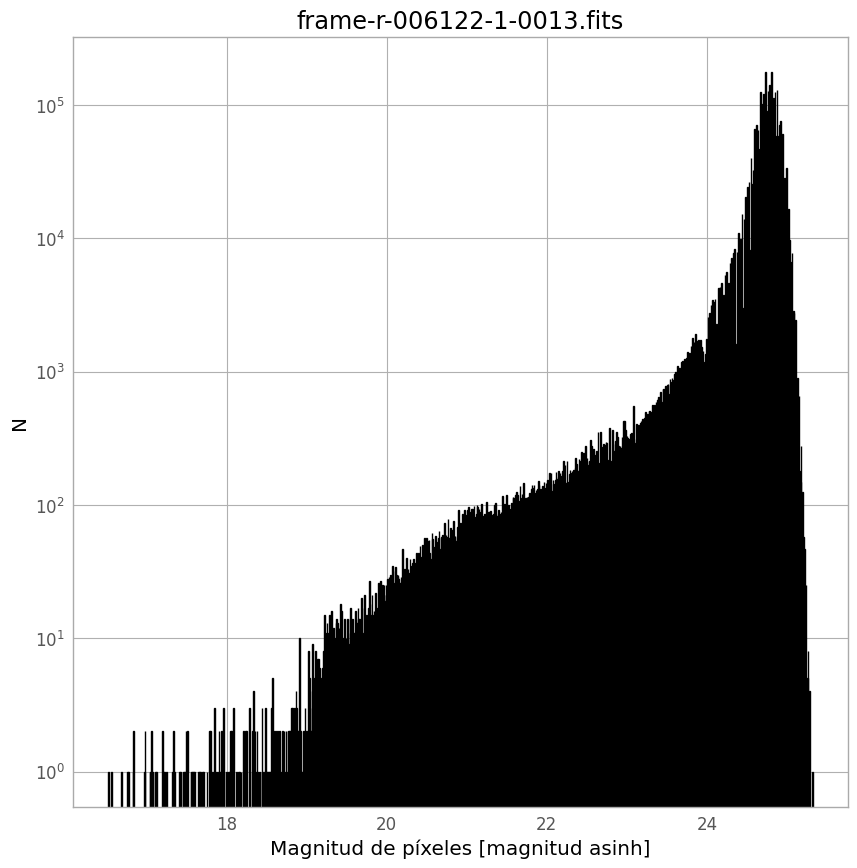

In [41]:
mag_image = im.get_array().data
fig = plt.figure(dpi=100)
ax = fig.add_subplot(111)
n, bins, patches = ax.hist(mag_image.flatten(), bins=1000, facecolor='k', edgecolor='k')
# foo = ax.set_xscale('registro')
foo = ax.set_yscale('log')
foo = ax.set_xlabel('Magnitud de píxeles [magnitud asinh]')
foo = ax.set_ylabel('N')
foo = ax.set_title('frame-r-006122-1-0013.fits')

Invertir la imagen de magnitud.

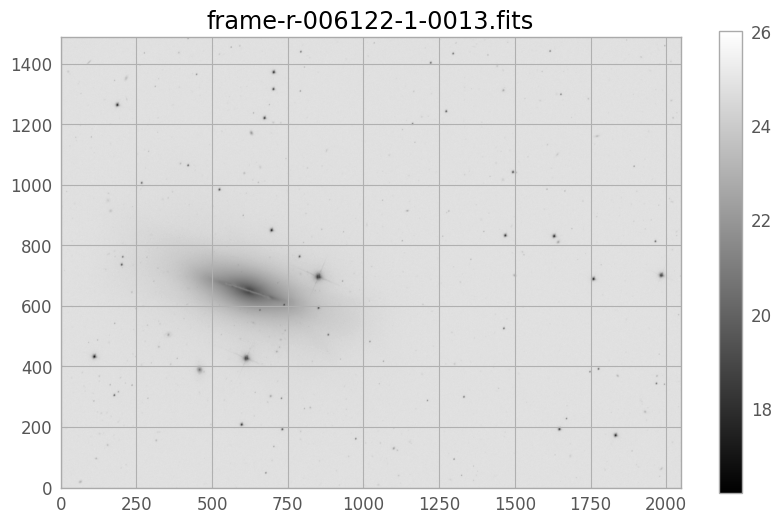

In [42]:
fig, im, cb = display_frame(6122, 1, 13, 'r', asinh=True, invert=True)

Y echa un vistazo a los otros colores.

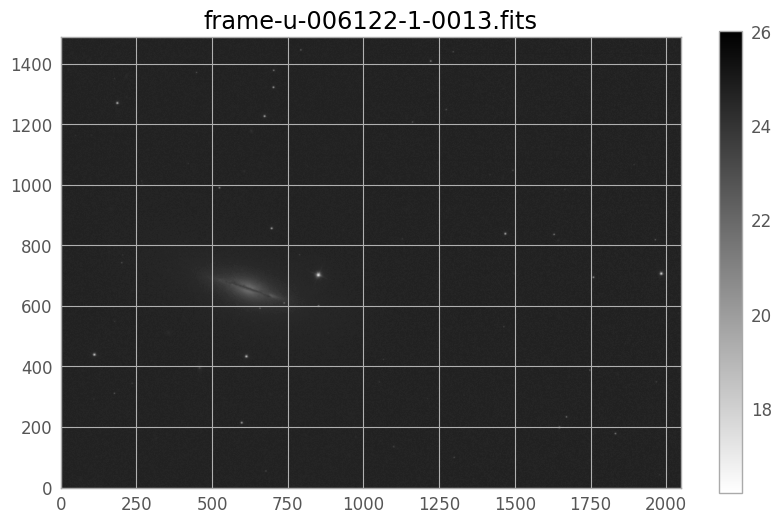

In [43]:
foo = display_frame(6122, 1, 13, 'u', asinh=True)

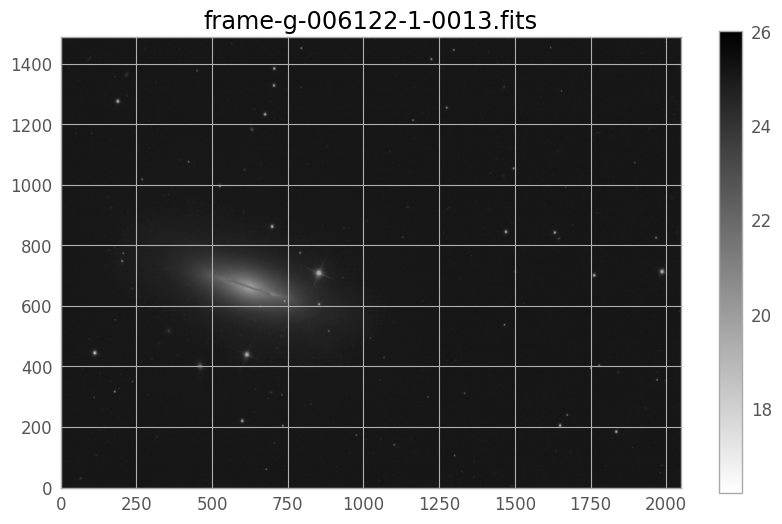

In [44]:
foo = display_frame(6122, 1, 13, 'g', asinh=True)

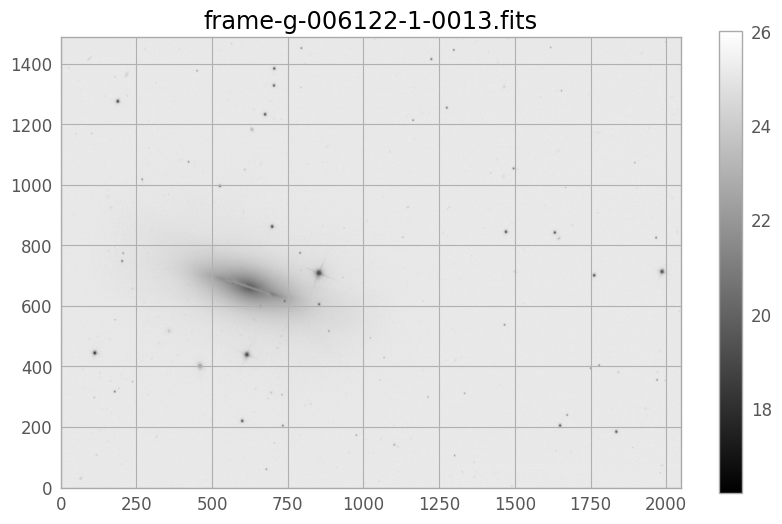

In [45]:
foo = display_frame(6122, 1, 13, 'g', asinh=True, invert=True)

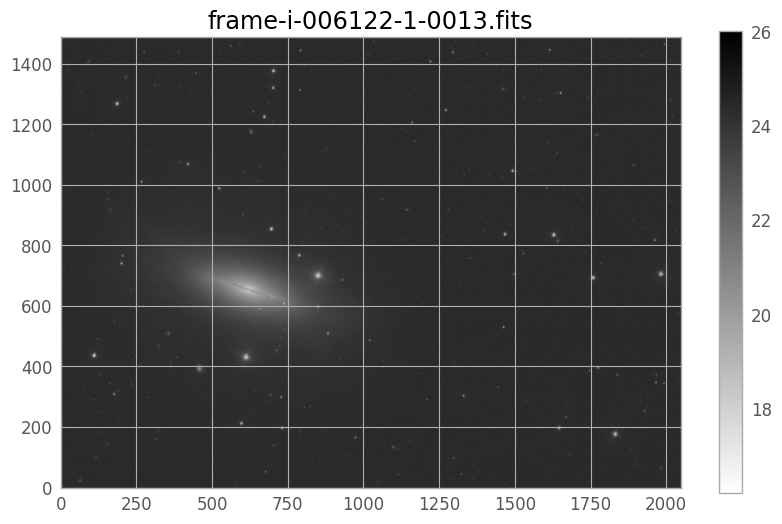

In [46]:
foo = display_frame(6122, 1, 13, 'i', asinh=True)

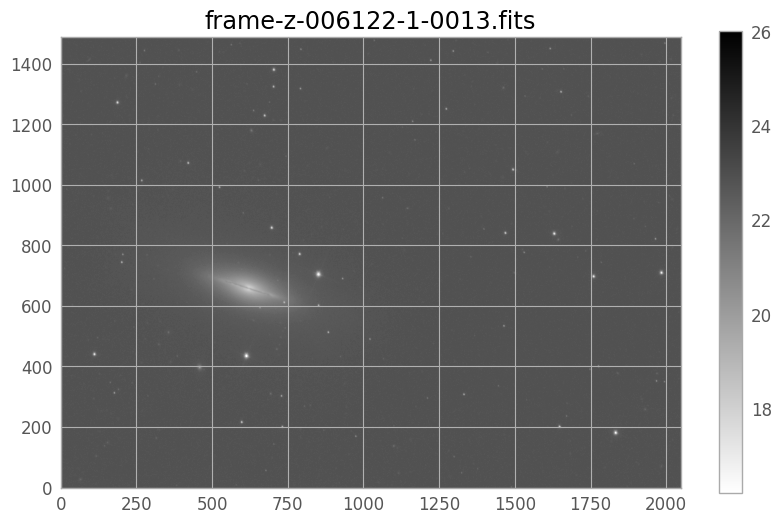

In [47]:
foo = display_frame(6122, 1, 13, 'z', asinh=True)

## Recursos y referencias

* BOSS: [Kyle S. Dawson, *et al.*, "The Baryon Oscillation Spectroscopic Survey of SDSS-III," *Astron. J.* **145** (2013) 10.](https://ui.adsabs.harvard.edu/abs/2013AJ....145...10D/abstract)
* eBOSS: [Kyle S. Dawson, *et al.*, "The SDSS-IV extended Baryon Oscillation Spectroscopic Survey: Overview and Early Data," *Astron. J.* **151** (2016) 44.](https://ui.adsabs.harvard.edu/abs/2016AJ....151...44D/abstract)
* SDSS-IV: [Michael R. Blanton, *et al.*, "Sloan Digital Sky Survey IV: Mapping the Milky Way, Nearby Galaxies and the Distant Universe," *Astron. J.* **154** (2017) 28.](https://ui.adsabs.harvard.edu/abs/2017AJ....154...28B/abstract)
* DR13: [Franco D. Albareti, *et al.*, "The 13th Data Release of the Sloan Digital Sky Survey: First Spectroscopic Data from the SDSS-IV Survey Mapping Nearby Galaxies at Apache Point Observatory," *Astrophys. J. Supp.* **233** (2017) 25.](https://ui.adsabs.harvard.edu/abs/2017ApJS..233...25A/abstract)
* DR14: [Bela Abolfathi, *et al.*, "The Fourteenth Data Release of the Sloan Digital Sky Survey: First Spectroscopic Data from the extended Baryon Oscillation Spectroscopic Survey and from the Second Phase of the Apache Point Observatory Galactic Evolution Experiment," *Astrophys. J. Supp.* **235** (2018) 42.](https://ui.adsabs.harvard.edu/abs/2018ApJS..235...42A/abstract)
* DR16: [Romina Ahumada, *et al.*, "The 16th Data Release of the Sloan Digital Sky Surveys: First Release from the APOGEE-2 Southern Survey and Full Release of eBOSS Spectra," *Astrophys. J. Supp.* **249** (2020) 3.](https://ui.adsabs.harvard.edu/abs/2020ApJS..249....3A/abstract)